In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


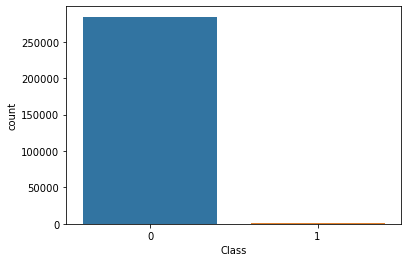

In [3]:
import seaborn as sns

sns.countplot(df.Class)

In [4]:
pos_features = df[df['Class'] == 1].iloc[:, :-1]
neg_features = df[df['Class'] == 0].iloc[:, :-1]

pos_labels = df[df['Class'] == 1].iloc[:, -1]
neg_labels = df[df['Class'] == 0].iloc[:, -1]

In [5]:
import tensorflow as tf

BUFFER_SIZE = 100000

def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [6]:
for features, label in pos_ds.take(1):
    print("Features:\n", features.numpy())
    print()
    print("Label: ", label.numpy())

Features:
 [ 9.15540000e+04 -5.10025566e+00  3.63344238e+00 -3.84391862e+00
  1.83208447e-01 -1.18399738e+00  1.60213933e+00 -3.00595315e+00
 -8.64503780e+00  1.28545811e+00 -3.71748138e+00  3.71921154e+00
 -5.03402975e+00  9.18999158e-01 -4.22036592e+00 -1.05049996e+00
 -1.69104527e+00 -2.37242321e+00  4.50098503e-01  4.07805061e-01
 -2.80630192e+00  8.28043933e+00 -2.79714954e+00  1.09070659e+00
 -1.59259597e-01  5.32156369e-01 -4.97125808e-01  9.43621625e-01
  5.53580692e-01  2.61220000e+02]

Label:  1


In [7]:
BATCH_SIZE = 32

resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(100)

In [8]:
for i, (batch_data, batch_label) in enumerate(resampled_ds.take(5)):
    print(f"batch count: {str(i)}")
    print(f"batch dataset shape: {batch_data.shape}")
    print(f"pos label: {np.sum(batch_label == 1)}\nneg label: {np.sum(batch_label == 0)}")
    print("")

batch count: 0
batch dataset shape: (32, 30)
pos label: 14
neg label: 18

batch count: 1
batch dataset shape: (32, 30)
pos label: 16
neg label: 16

batch count: 2
batch dataset shape: (32, 30)
pos label: 14
neg label: 18

batch count: 3
batch dataset shape: (32, 30)
pos label: 14
neg label: 18

batch count: 4
batch dataset shape: (32, 30)
pos label: 16
neg label: 16

